# 4: 서울 종합병원 분포 확인하기

김보람  
2022-11-24

# 공공데이터 상권정보 분석해보기

## 필요한 라이브러리 불러오기

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

## 시각화를 위한 폰트 설정

In [6]:
# ctrl(cmd) + / : 주석처리를 풀었다 했다 

import matplotlib.pyplot as plt
 # window의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic') #윈도우의 경우

# plt.rc('font', family='AppleGothic') #맥의 경우

plt.rc('axes', unicode_minus=False) #마이너스 폰트 깨지는 것 대비

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [7]:
from IPython.display import set_matplotlib_formats
#폰트가 선명하게 보이기 위해

%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [8]:
!move "C:\Users\user\Downloads\소상공인시장진흥공단_상가업소정보_의료기관_201909.csv"

지정된 파일을 찾을 수 없습니다.

In [9]:
df = pd.read_csv("data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
# low_memory=False로 설정이 되어야 한다. 안그럼 오류남.
df.shape # 데이터의 행과 열 크기를 찍어볼 수 있따

## 데이터 미리보기

-   head, tail을 통해 데이터를 미리 볼수 있따

In [10]:
# shift + tab 키를 누르면 docstring을 볼 수 있다
# head: 데이터 미리보기
df.head(1)

In [11]:
# tail: 마지막 데이터 불러오기
df.tail(1)

## 데이터 요약하기

### 요약정보

In [12]:
# 요약정보가 나타난다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [13]:
# object : 문자열로 된 데이터 타입
# int: 정수형
# float : 실수형

### 컬럼명보기

In [14]:
# 컬럼명만 추출해보기
df.columns

### 데이터 타입

In [15]:
# 데이터 타입만 출력
df.dtypes

## 결측치

In [16]:
df.isnull()
# true로 표시되는 값은 null 값! 

In [17]:
null_count = df.isnull().sum()
null_count

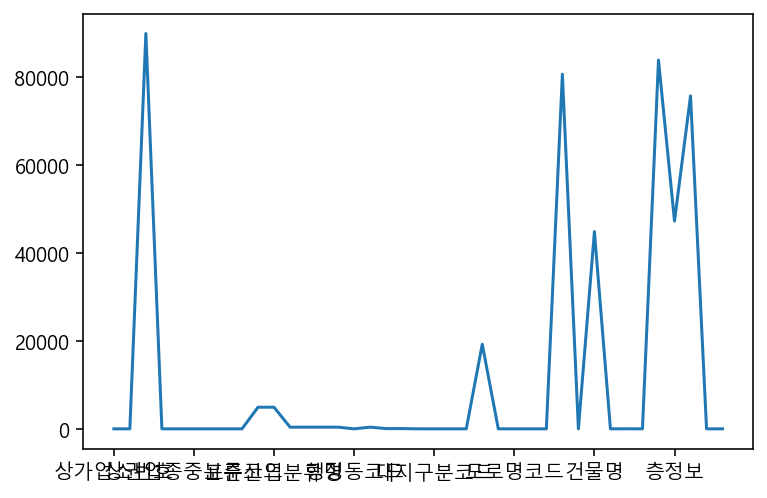

In [18]:
# 결측치를 막대그래프로 표현
null_count.plot() # 선그래프로 표시되는데.. 적합하지 않은 거 같아!

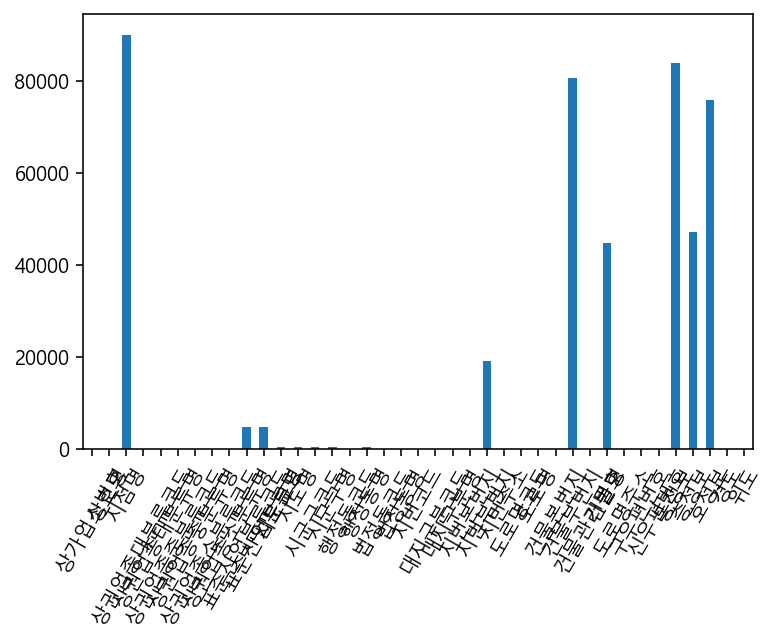

In [19]:
null_count.plot.bar(rot=60)
# rot = 글자 돌려보는것

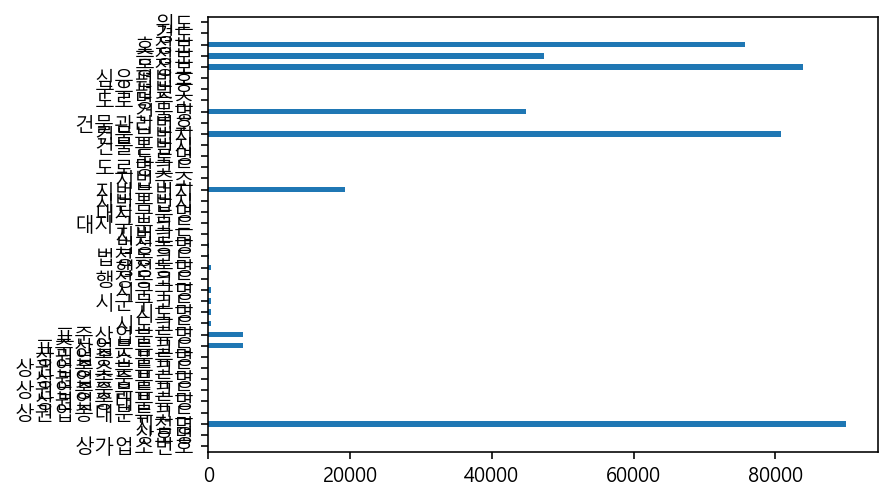

In [20]:
null_count.plot.barh()

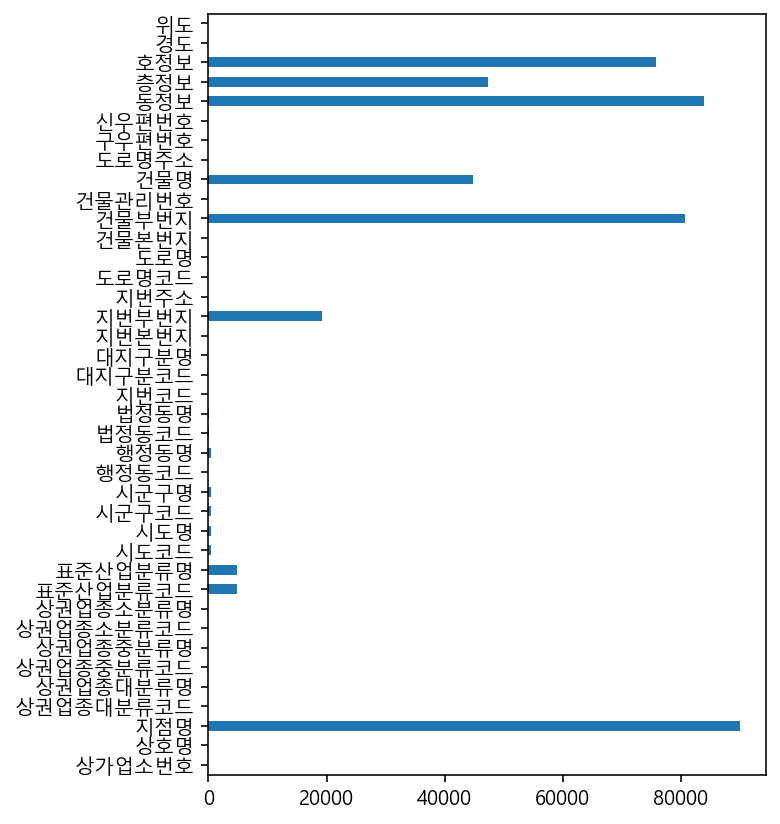

In [21]:
null_count.plot.barh(figsize=(5,7)) # 그래프 사이즈 지정

In [22]:
# 위에서 계산한 결측치 수를 reset_index 통해 데이터 프레임으로 만들기
# df_null_coount 변수에 결과를 담아 head로 미리보기 해보기

df_null_count = null_count.reset_index()
df_null_count.head()

## 컬럼명 변경하기

In [23]:
# 변수에 담겨있는 컬럼이름 변경

df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

## 정렬하기

In [24]:
# sort_values 통해 정렬
# 결측치가 많은 순으로 상위 10개 출력

df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top 

## 특정 컬럼만 불러오기

In [25]:
# 지점명 컬럼 불러오기
# NaN == Not a Number의 약자로 결측치를 의미한다.

df["지점명"].head()

In [26]:
# "컬럼명" 이라는 컬럼 값만 가져와서 drop_columns 라는 변수에 담기

drop_columns = df_null_count_top["컬럼명"].tolist()    # tolist : list로 만들어줌
drop_columns 

In [27]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져오기
df[drop_columns].head()

## 제거하기

In [28]:
print(df.shape)

df = df.drop(drop_columns, axis=1) 
# axis=1 컬럼기준으로 drop axis > 행(0), 열 (1)

print(df.shape)

(91335, 39)
(91335, 29)

In [29]:
# 제거 결과 info로 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기

### 기초 통계 수치

In [30]:

df.dtypes

In [31]:
#평균값
df["위도"].mean()

In [32]:
# 중앙값
df["위도"].median()

In [33]:
# 최댓값
df["위도"].max()

In [34]:
# 최솟값
df["위도"].min()

In [35]:
# 갯수
df["위도"].count()

### 기초통계값 요약하기 - describe

데이터를 요약해서 볼 수 있음

In [36]:
# 위도를 descibe로 요약

df["위도"].describe()

In [37]:
# 2개의 컬럼을 describe로 요약
df["위도", "경도"] 

# pandas에서는 리스트 형태로 가져와야한다. 위와 같이 하면 오류남

In [38]:
df[["위도", "경도"]]

In [39]:
df[["위도", "경도"]].describe()

In [40]:
# describe로 문자열 데이터타입 요약

df.describe() # 기본값은 수치형으로 되어있음!


In [41]:
df.describe(include="object")

# top : 가장 많이 나타난걸 보여줌
# freq : frequency : 빈도수.. 리원이라는 상호명이 152번 등장한다.
# 결측치는 제외하고 보여줌! 

In [42]:
# 모든 데이터 요약
df.describe(include="all")

### 중복제거한 값 보기

-   unique로 중복 제거 nuique 갯수 세기

In [43]:
# 상권업종대분류명

df["상권업종대분류명"].unique()

In [44]:
df["상권업종대분류명"].nunique()

In [45]:
# 상권업종중분류명
df["상권업종중분류명"].unique()

In [46]:
df["상권업종중분류명"].nunique()

In [47]:
# 상권업종소분류명
df["상권업종소분류명"].unique()

In [48]:
df["상권업종소분류명"].nunique()

In [49]:
len(df["상권업종소분류명"].unique())

### 그룹화된 요약값 보기 - value_counts

-   카테고리 형태의 데이터 갯수를 셀 수 있다.

In [50]:
# 시도코드 세어보기 -> 결측치...
df["시도명"].head()

In [51]:
# 시도명 세보면
city = df["시도명"].value_counts()
city

In [52]:
# normalize=True 옵션 사용시 비율을 구할 수 있다.

city_normalize= df["시도명"].value_counts(normalize=True)
city_normalize

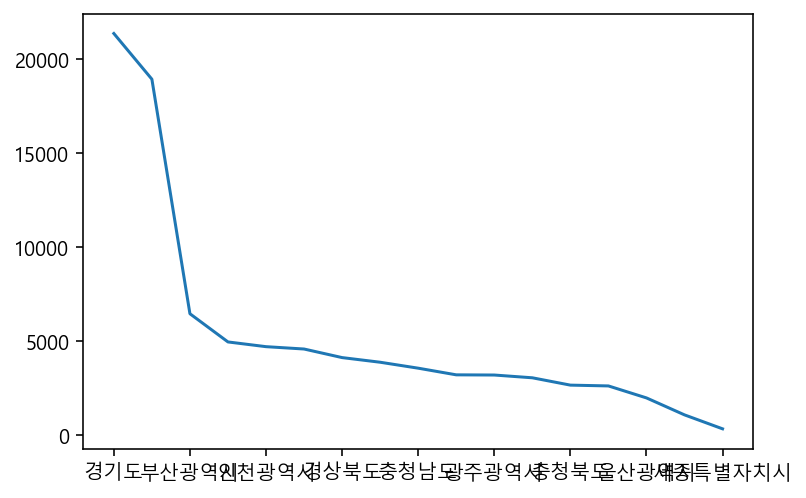

In [53]:
city.plot()

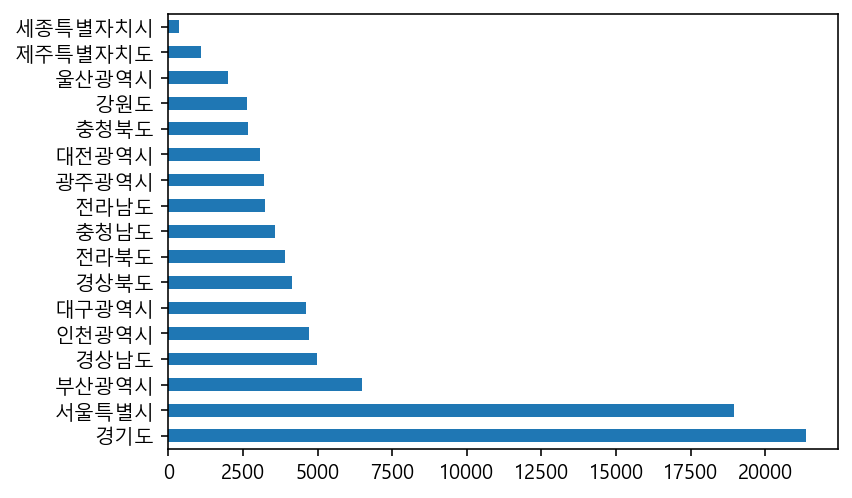

In [54]:
 # 막대그래프 표현
city.plot.barh()

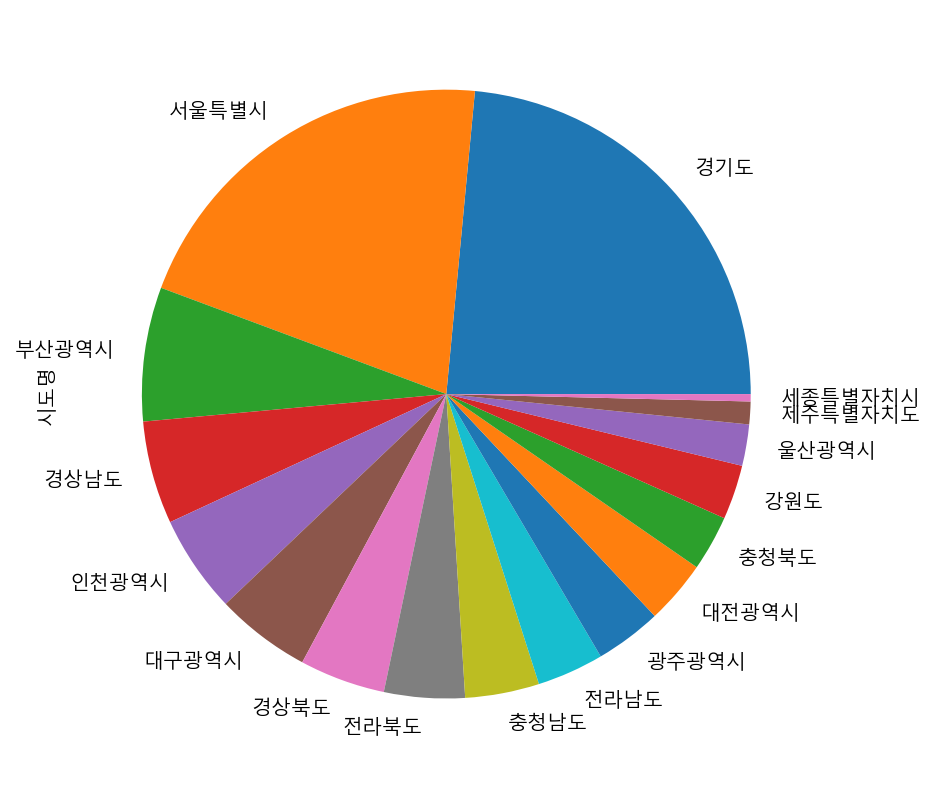

In [55]:
# plto.pie() 사용하여 파이그래프 그리기
city_normalize.plot.pie(figsize=(7,7))

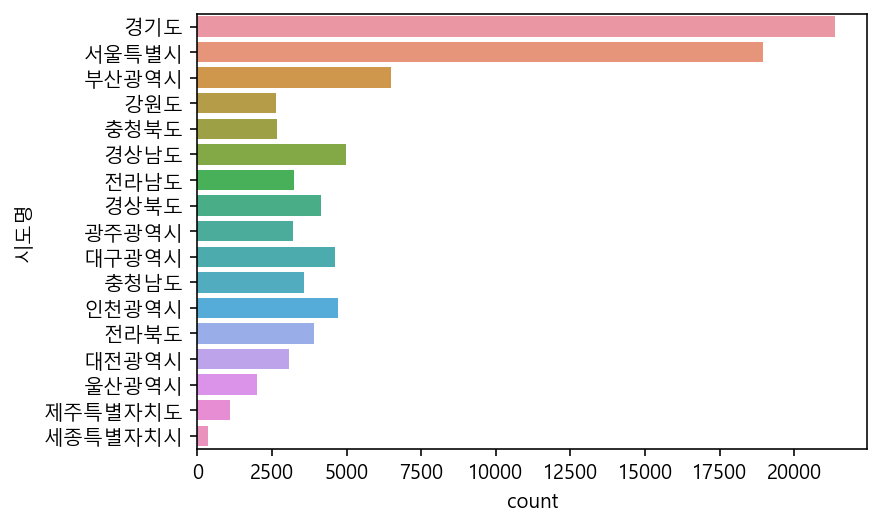

In [56]:
# seaborn의 countplot 그리기
sns.countplot(data=df, y="시도명" )

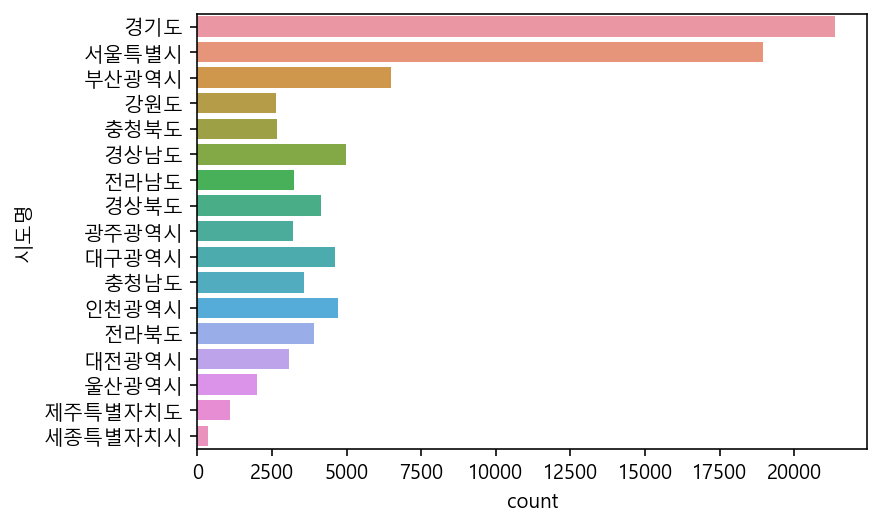

In [57]:
c=sns.countplot(data=df, y="시도명" ) 
# 변수명에 담아주면 밑에 글씨가 없어진당 

In [58]:
df["상권업종대분류명"].value_counts()

In [59]:
d= df["상권업종중분류명"].value_counts()
d

In [60]:
n =df["상권업종중분류명"].value_counts(normalize=True)
n

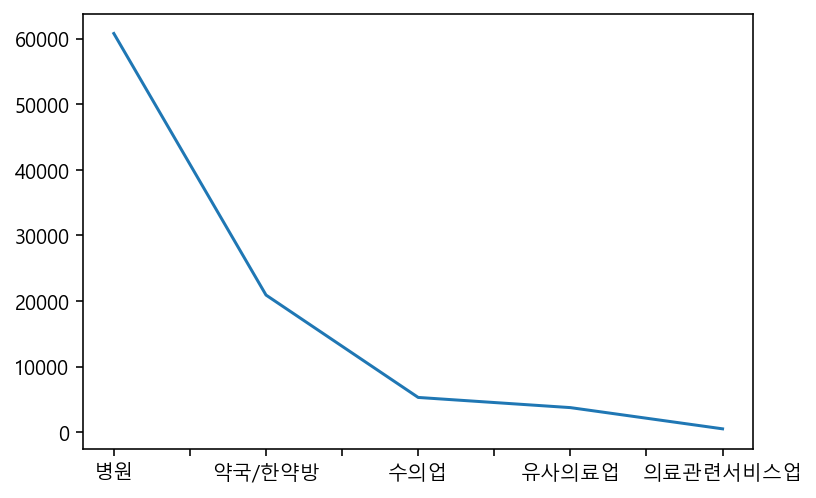

In [61]:
d.plot()

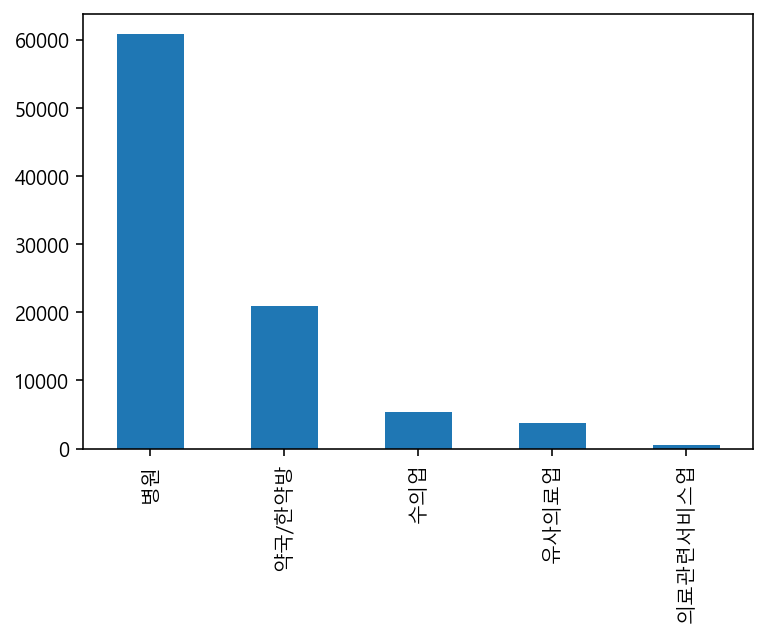

In [62]:
d.plot.bar()

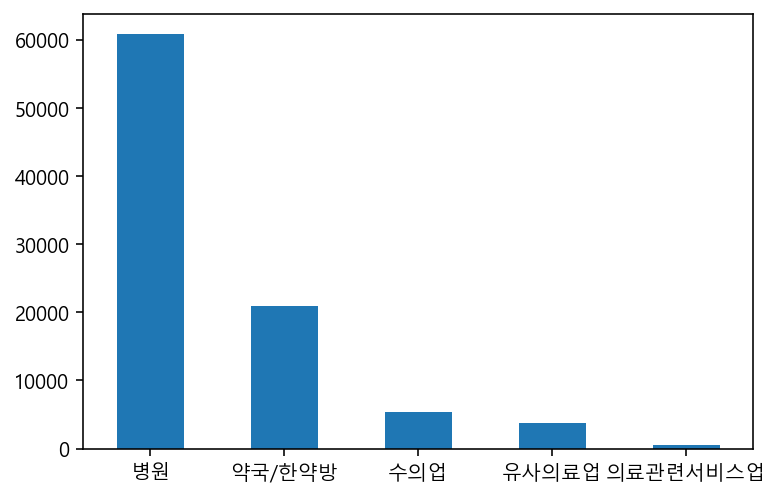

In [63]:
d.plot.bar(rot=0) # x축 레이블 값 회전

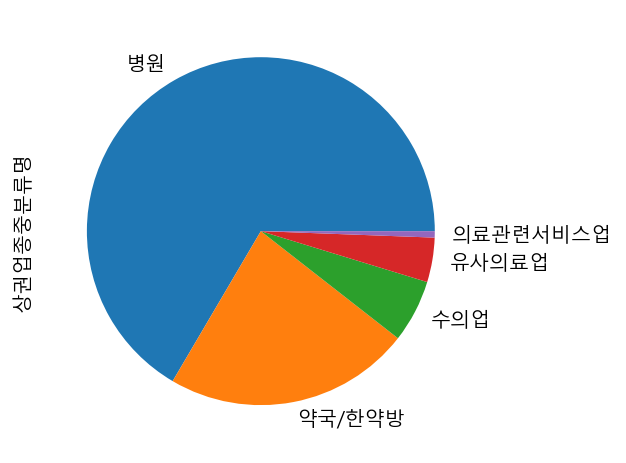

In [64]:
n.plot.pie()

In [65]:
c = df["상권업종소분류명"].value_counts()
c

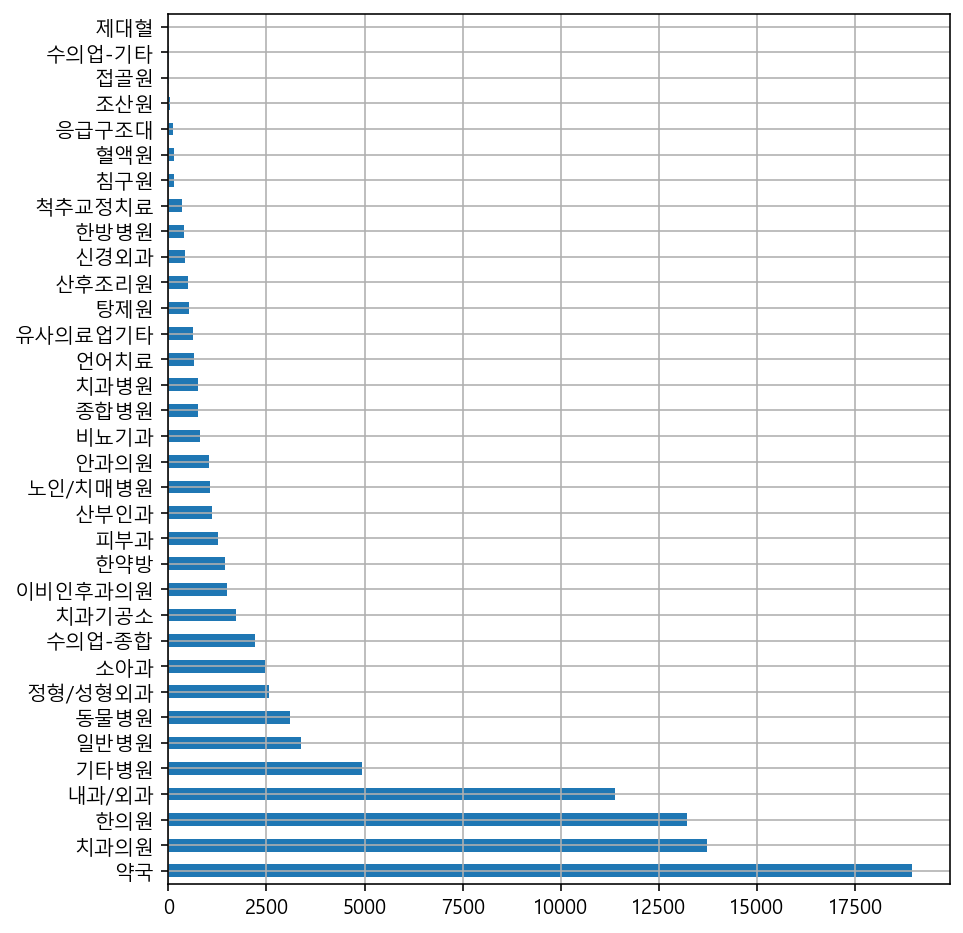

In [66]:
c.plot.barh(figsize=(7, 8), grid= True) #gird: 격자 표시

## 데이터 색인하기

In [73]:
# 상권업종분류명이 약국/한약방인 데이터만 가져와서
# df_medical이라는 변수에 담고
# head()통해 미리보기

df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head(1)

In [77]:
# 상권업종대분류명이 의료만 가져오기
# df.loc 사용하면 행, 열을 함께 가져온다.
# 이 기능을 통해 상권업종중뷴려망만 가져온다
# 가져온 결과를 value_counts를 통해 중분류의 갯수를 세본다.

df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()


In [ ]:
# 위와 같은 기능을 수행하는 코드
# df.loc[df["상권업종대분류명"] == "의료"]["상권업종중분류명"] 근데 이건 느리다!! 

In [78]:
m = df["상권업종대분류명"] == "의료"
df.loc[m, "상권업종중분류명"].value_counts()

In [80]:
# 유사의료업
df[df["상권업종중분류명"] == "유사의료업"]

In [81]:

df[df["상권업종중분류명"] == "유사의료업"].shape

In [86]:
# 상호명 그룹화해서 갯수
# value_counts를 사용해 상위 10개 출력

df["상호명"].value_counts().head(10)

In [85]:

df["상호명"].value_counts().tail()

In [87]:

df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi

In [91]:
df_medi["상호명"].value_counts().head(10)

### 여러 조건으로 색인하기

In [93]:
# 상권업종소분류명이 약국이고 시도명이 서울특별시인 데이터
df["상권업종소분류명"] == "약국"  and df["시도명"] == "서울특별시"
# 오류! 판다스에서는 & 써야함. 

In [94]:

df["상권업종소분류명"] == "약국"  & df["시도명"] == "서울특별시"
# 오류! 연산자 우선순위 때문에 오류가 났다.

In [100]:

df_seoul_drug = df[(df["상권업종소분류명"] == "약국")  & (df["시도명"] == "서울특별시")]
print(df_seoul_drug.shape)
df_seoul_drug.head(1)

(3579, 29)

### 구별로 보기

In [105]:
# 시군구명으로 그룹화해서 갯수 세어보기
# 구별로 약국이 몇개가 있는지 확인
c = df_seoul_drug["시군구명"].value_counts()
c.head()

In [107]:
n = df_seoul_drug["시군구명"].value_counts(normalize=True)
n.head()

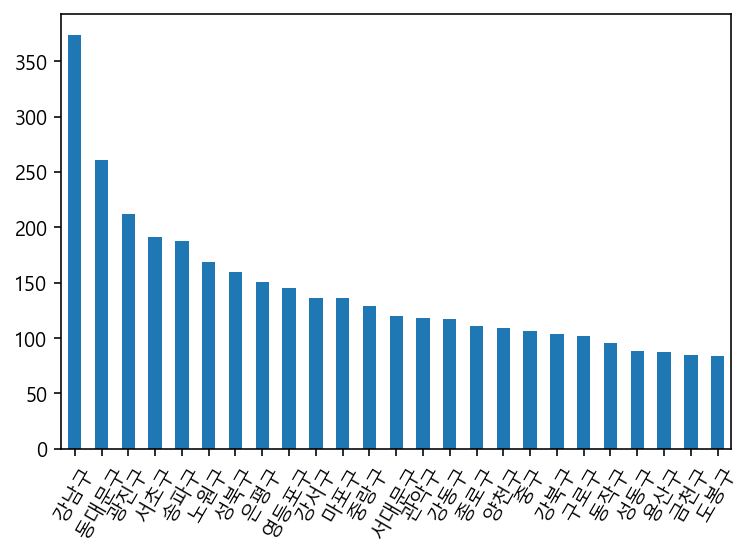

In [109]:
c.plot.bar(rot=60) #rot:글씨를 기울인다

In [112]:
# 상권업종소분류명이 종합병원
# 시도명이 서울특별시인 데이터

df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"] == "서울특별시")].copy()
# copy를 해줘야 df_soeul_hospital 이 바뀐다. df까지 바뀌지 않는다. 
df_seoul_hospital

In [115]:
df_seoul_hospital["시군구명"].value_counts()

### 텍스트 데이터 색인하기

In [124]:
# 색인 전 상호명 중에 종합병원이 아닌 데이터 찾기
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"),"상호명"].unique()

# str.contains하면 특정 값만 찾을 수 있다. 
# 앞에 물결 표시를 하게 되면 종합병원이 안들어간 것만 찾을 수 있다. 

In [126]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

In [128]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]

In [129]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")]

In [130]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index

In [131]:
# 종합병원과 무관한 데이터를 전처리를 위해 해당 텍스트 한번에 검색
# 제거할 데이터의 인덱스만 drop_row에 담아주고 list 형태로 변환

drop_row = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drop_row = drop_row.tolist() 
drop_row

In [139]:
# 의원으로 끝나는 데이터 인덱스 찾기
# drop_row2 에 담고 list 변환
# str.endswith() : ~로 끝나는거

drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()
drop_row2

In [143]:
# 삭제할 행을 drop_row에 합치기
drop_row = drop_row + drop_row2
len(drop_row)

In [147]:
# 해당 셀을 삭제하고 삭제 전 후의 행의 갯수 비교
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)

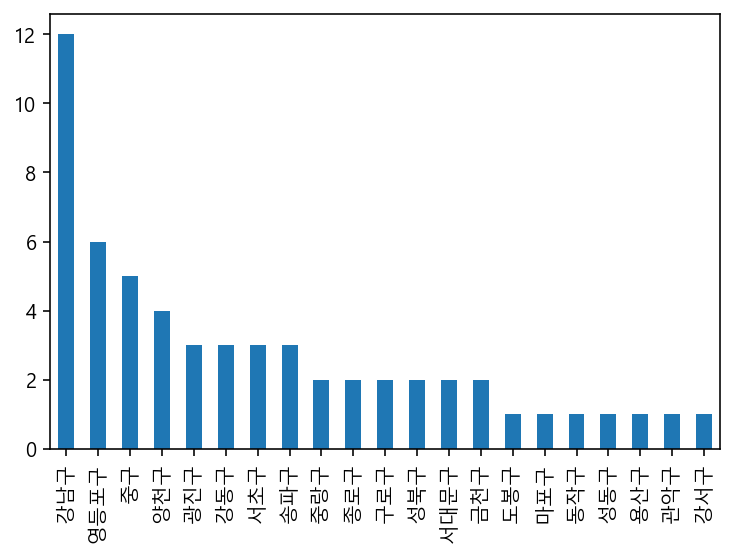

In [149]:
# 시군구명에 따라 종합병원의 숫자
df_seoul_hospital["시군구명"].value_counts().plot.bar()

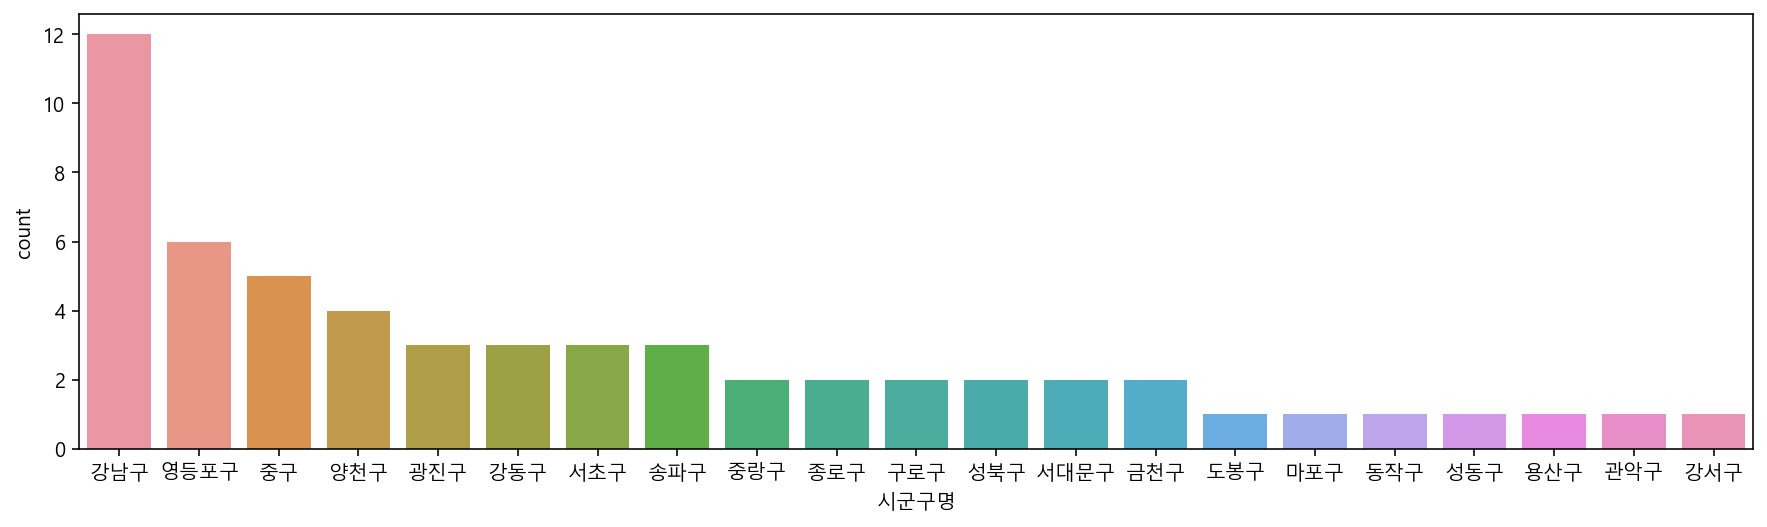

In [156]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x="시군구명", order=df_seoul_hospital["시군구명"].value_counts().index)

In [157]:
df_seoul_hospital["상호명"].unique()

### 특정 지역만 보기

In [159]:
# 서울에 있는 데이터의 위도와 경도 보기
# 결과를 df_seoul 이라는 df에 저장
# 새로운 변수에 데이터프레임 저장시 copy()를 사용

df_seoul= df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

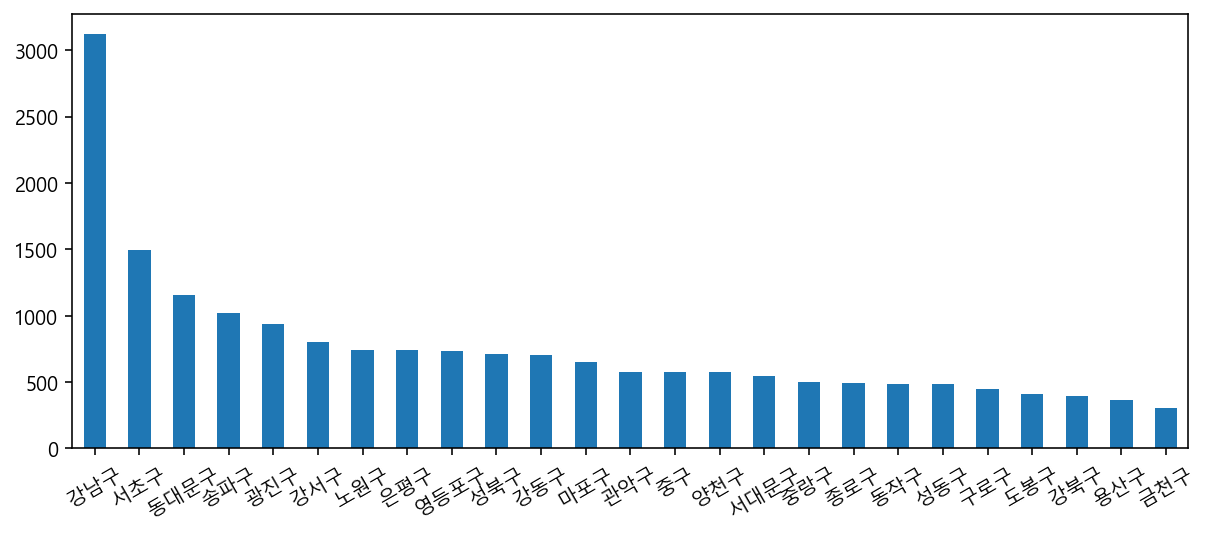

In [164]:
# seaborn 의 countplot를 사용해 위에서 만든 데이터프레ㅣㅁ의 시군구명 시각화
df_seoul["시군구명"].value_counts().head()
df_seoul["시군구명"].value_counts().plot.bar(figsize=(10,4), rot=30)

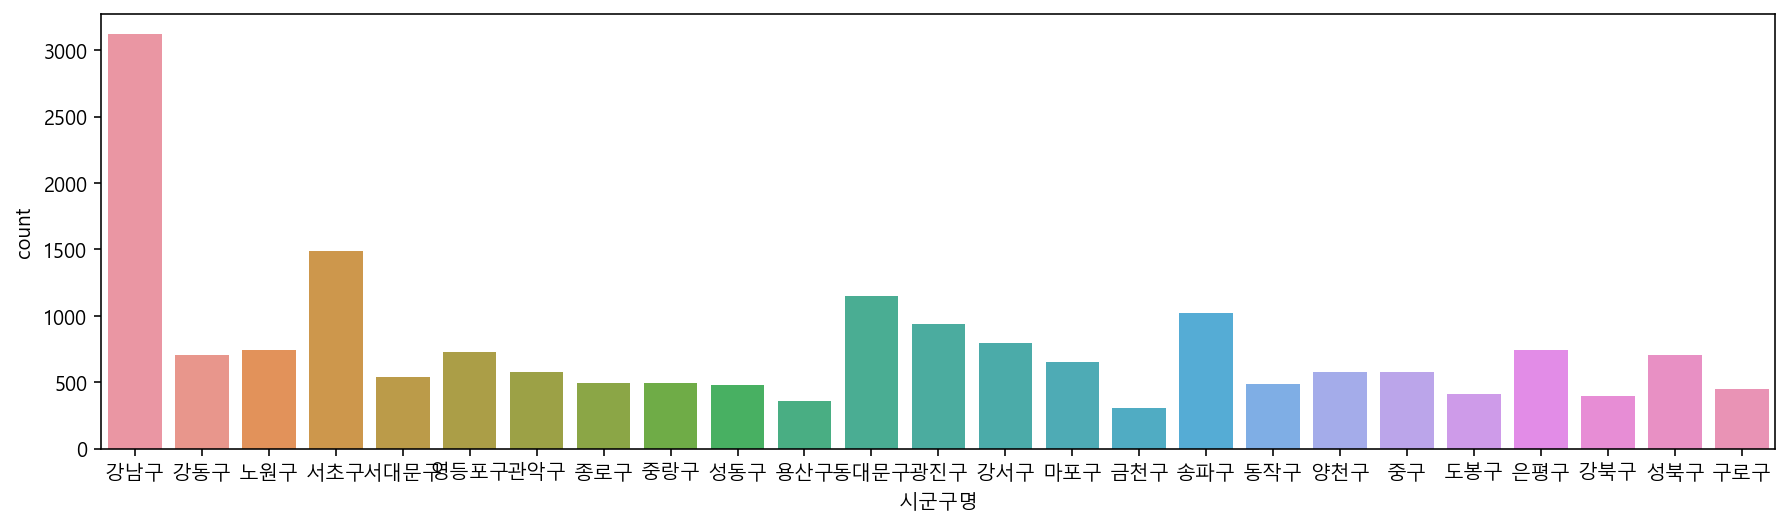

In [168]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul, x="시군구명")
# x축 y축 두개 중 하나만 지정해주면 된다.

In [170]:
# pandas의 plot.scatter를 통해 경도와 위도 표시
df_seoul[["경도", "위도", "시군구명"]].plot.scatter()
# scatter는 x축과 y축이 꼭 들어가야 한다!!

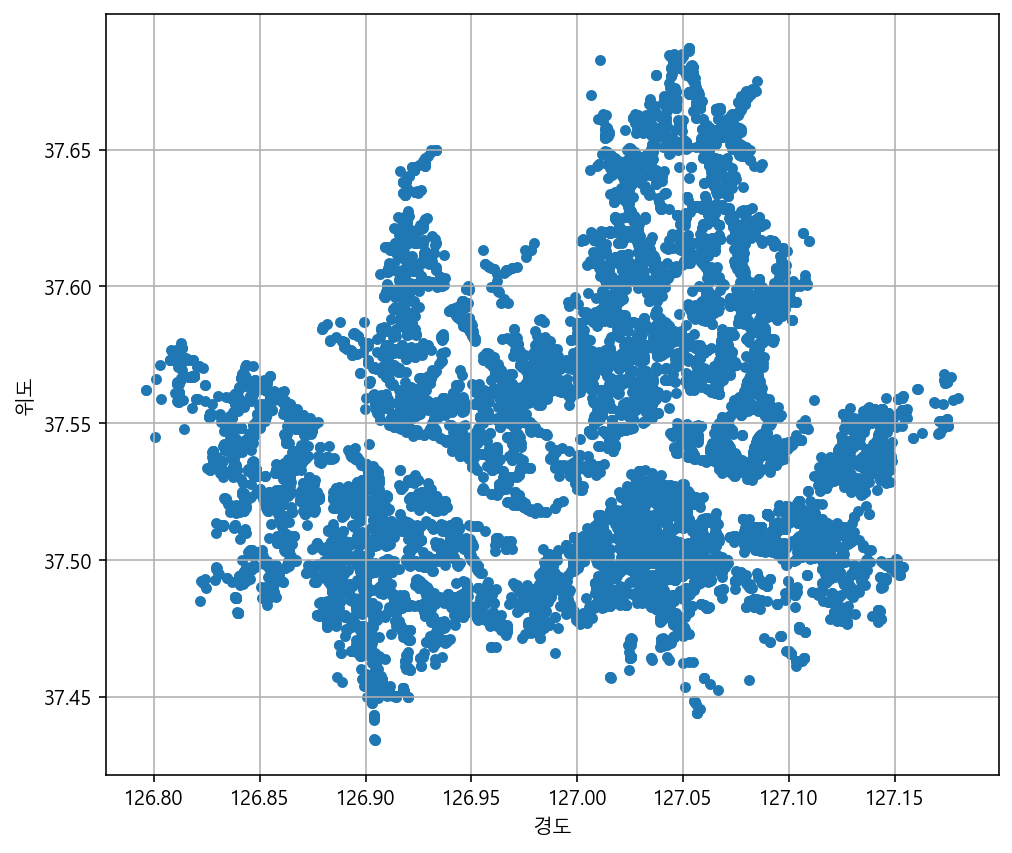

In [173]:
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x="경도", y="위도", figsize=(8,7), grid=True)

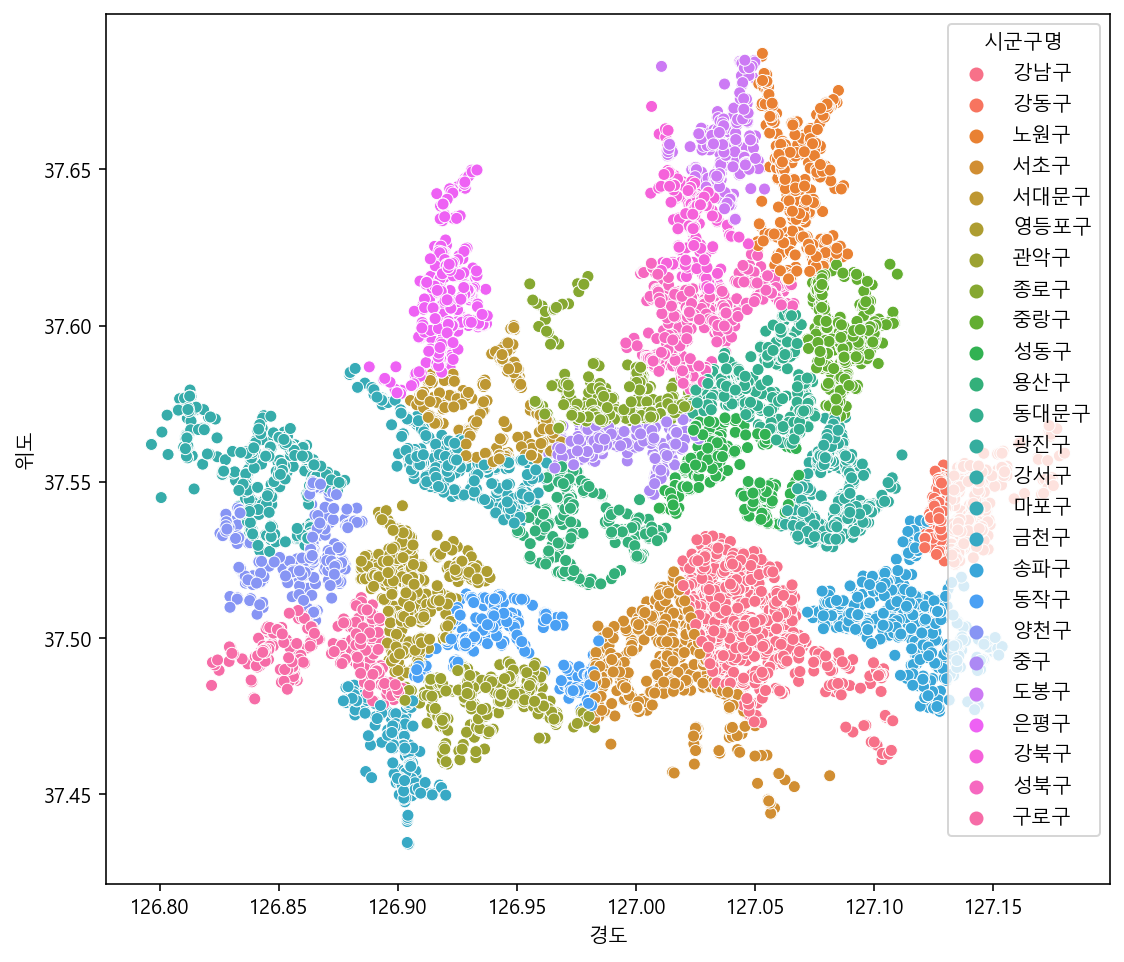

In [176]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul,x="경도", y="위도", hue="시군구명") 
# hue: 색상 다르게

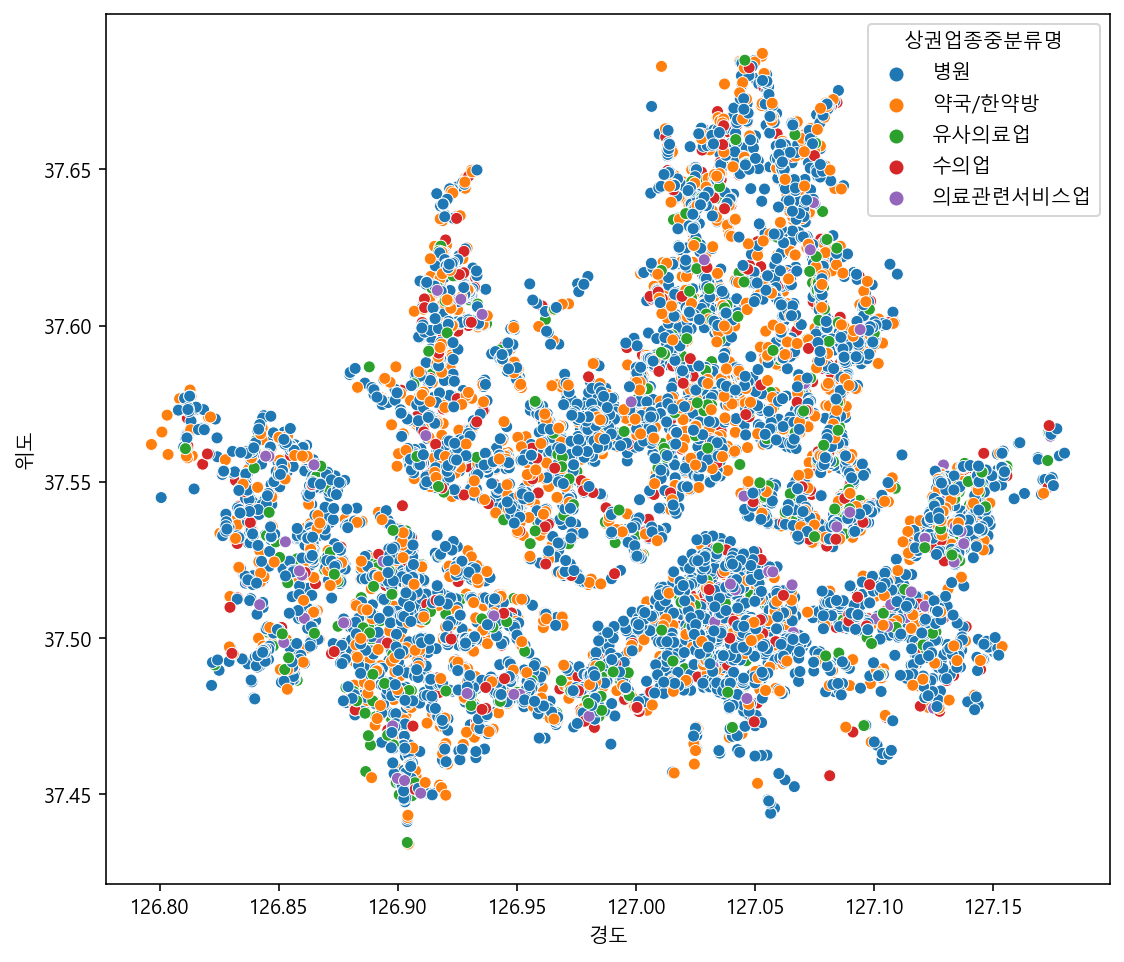

In [177]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul,x="경도", y="위도", hue="상권업종중분류명") 

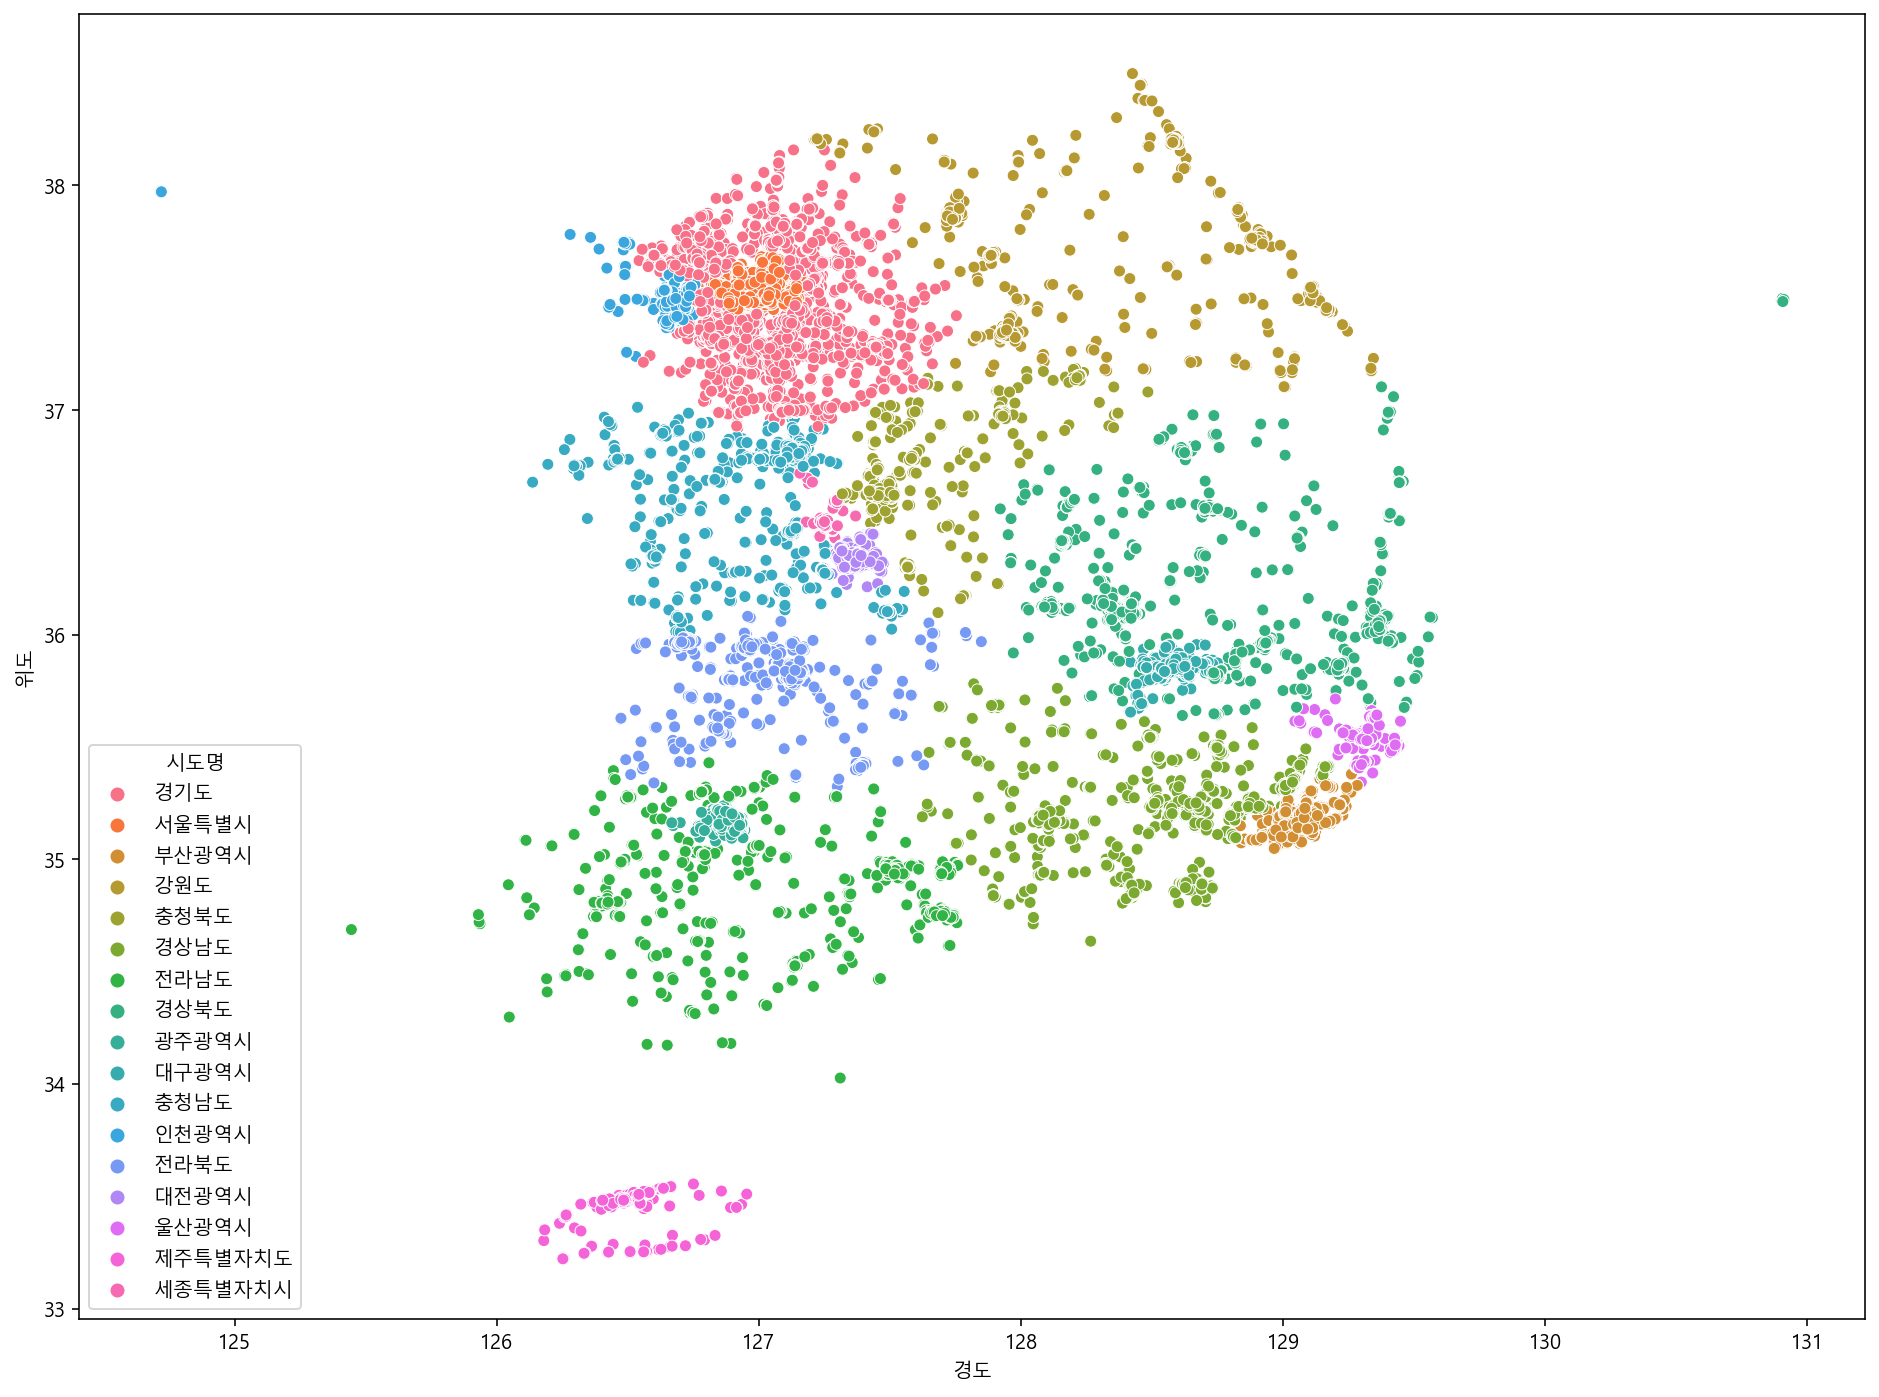

In [180]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df,x="경도", y="위도", hue="시도명") 

## Folium으로 지도 활용

In [183]:
import folium
# 아나콘다에서 folium 별도 설치해야함
# conda install -c conda-forge folium
# 지도 시각화를 위한 라이브러리

m= folium.Map(location=[45.5236, -122.6750])

In [184]:
m

In [185]:
folium.Map()
# 세계 지도 출력! 

In [ ]:
folium.Map()

In [187]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구한다.

df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

In [192]:
map = folium.Map(location=[df_seoul_hospital["위도"].mean(),df_seoul_hospital["경도"].mean()], zoom_start=12)

In [193]:
df_seoul_hospital.head(1)

In [201]:
for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map